# CMPINF0010: The Playgrounds of Pittsburgh
Group Members: Thomas Ku, Zachary Ogren, James Duncan
## Introduction
In this project, we are tasked with finding out what the best neighborhood is in Pittsburgh. Easier said than done really, as first we must define what the best neighborhood is.
## The Metric
We looked at several different metrics to determine what is the best neighborhood, such as crime rates and diabetes insurance, but ultimately we determined that happiness in a neighborhood is the best factor. Of course, crime rates and diabetes insurance are important, it means nothing if you are just sad and depressed anyway. The happiness of the community ultimately sets the stage for a neighborhood that people would want to live at. 
### What defines happiness?
Here we reach another problem though: what defines happiness? To answer this, we are looking for two things in specific:


Water Features: Water fountains, spray fountains, or decorations involving public use of water

Playgrounds: This ones pretty self explanatory: An outdoor area for people (generally kids) to play in or at

In the case of happiness, we are looking at factors that contribute to leisure options or recreational activities, thus why we chose to look at playgrounds and water features. An abundance of these two features signify that there are plenty of places to go and things to do in that neighborhood and would most likely ensure a general happiness within the neighborhood.

Lets get started on the search for the best neighborhood. These are the datasets we are using to find it:

City of Pittsburgh Water Features - https://data.wprdc.org/dataset/city-water-features 

City of Pittsburgh Playgrounds - https://data.wprdc.org/dataset/playgrounds

Additionally, we will be focusing our analysis of our data with pandas:

In [3]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

One last note, in order to make sure that our metric is an accurate representation of the quality of neighborhoods, it is beneficial to analyze the latitude and longitude of the various parks and water features. If there is an even distribution of them throughout the city, then our metric will yield the largest neighborhood, not the best.


## Looking at the graphs longitudinally and latitudinally

Before we get into a graphical look at things, we can first examine the general locations of all playgrounds and water features in the city of Pittsburgh using scatter plots. Heres the scatterplot for playgrounds:

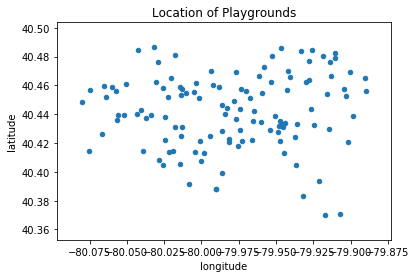

In [4]:
playgrounds = pd.read_csv("https://data.wprdc.org/datastore/dump/47350364-44a8-4d15-b6e0-5f79ddff9367")
playgrounds.plot(kind = 'scatter', x = 'longitude', y = 'latitude', title = 'Location of Playgrounds')

Next, water features

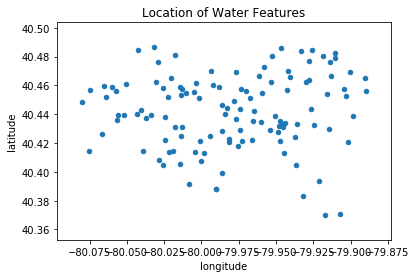

In [6]:
water = pd.read_csv("https://data.wprdc.org/datastore/dump/47350364-44a8-4d15-b6e0-5f79ddff9367")
water.plot(kind = 'scatter', x = 'longitude', y = 'latitude',title = 'Location of Water Features')

By observing the locations of the structures directly, we can clearly see that the two scatter plots are similar, meaning that where there are more playgrounds, there are more water features. Essentially, there is a large overlap in playgrounds and water features. The scatterplots give us a good overview of how the data will turn out.


## Playgrounds: Data and Graphs
While we could use the generated scatter plots along with a map of the city to determine which neighborhood is the best, there are still more efficient ways to analyze this. Since the given data provides us with the neighborhood that each structure is found in, we can create a bar graph so that the neighborhood with the most playgrounds can be clearly seen. For the sake of neatness, we will be using the pd feature .head() to limit the amount of data shown:

In [5]:
playgrounds = pd.read_csv("https://data.wprdc.org/datastore/dump/47350364-44a8-4d15-b6e0-5f79ddff9367")
playgrounds.head()

,id,name,type,maintenance_responsibility,park,street,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,731501774,Able Long Playground,NaN,Parks - Western,Able Long Park,COAST AVE,https://tools.wprdc.org/images/pittsburgh/play...,Beechview,4,19,42003192000,5,19,6,4-28,40.408365,-80.028445
1,1461276747,Albert Graham Playground,NaN,Parks - Schenley,Albert Turk Graham Park,FORESIDE PL,https://tools.wprdc.org/images/pittsburgh/play...,Crawford-Roberts,6,3,42003030500,3,3,2,2-1,40.440519,-79.984137
2,1860709784,Alpine Playground,NaN,Parks - Northern,Alpine Gardens Park,ALPINE AVE,https://tools.wprdc.org/images/pittsburgh/play...,Central Northside,6,25,42003250300,1,25,1,1-21,40.457707,-80.012952
3,1770671485,Alton Playground,NaN,Parks - Western,Alton Park,ANDICK WAY,https://tools.wprdc.org/images/pittsburgh/play...,Beechview,4,19,42003191600,5,19,6,4-28,40.414137,-80.021831
4,18942817,Ammon Playground,NaN,Parks - Schenley,Ammon Park,MEMORY LN,https://tools.wprdc.org/images/pittsburgh/play...,Bedford Dwellings,6,5,42003050900,3,5,2,2-5,40.449037,-79.978064


We can see in the data set the longitude and latitude of each park, and general location of each park compared to its neighborhood. These are the most important factors in our metric.

Next, using the data we can look at a graph of all the general playgrounds in a neighborhood!

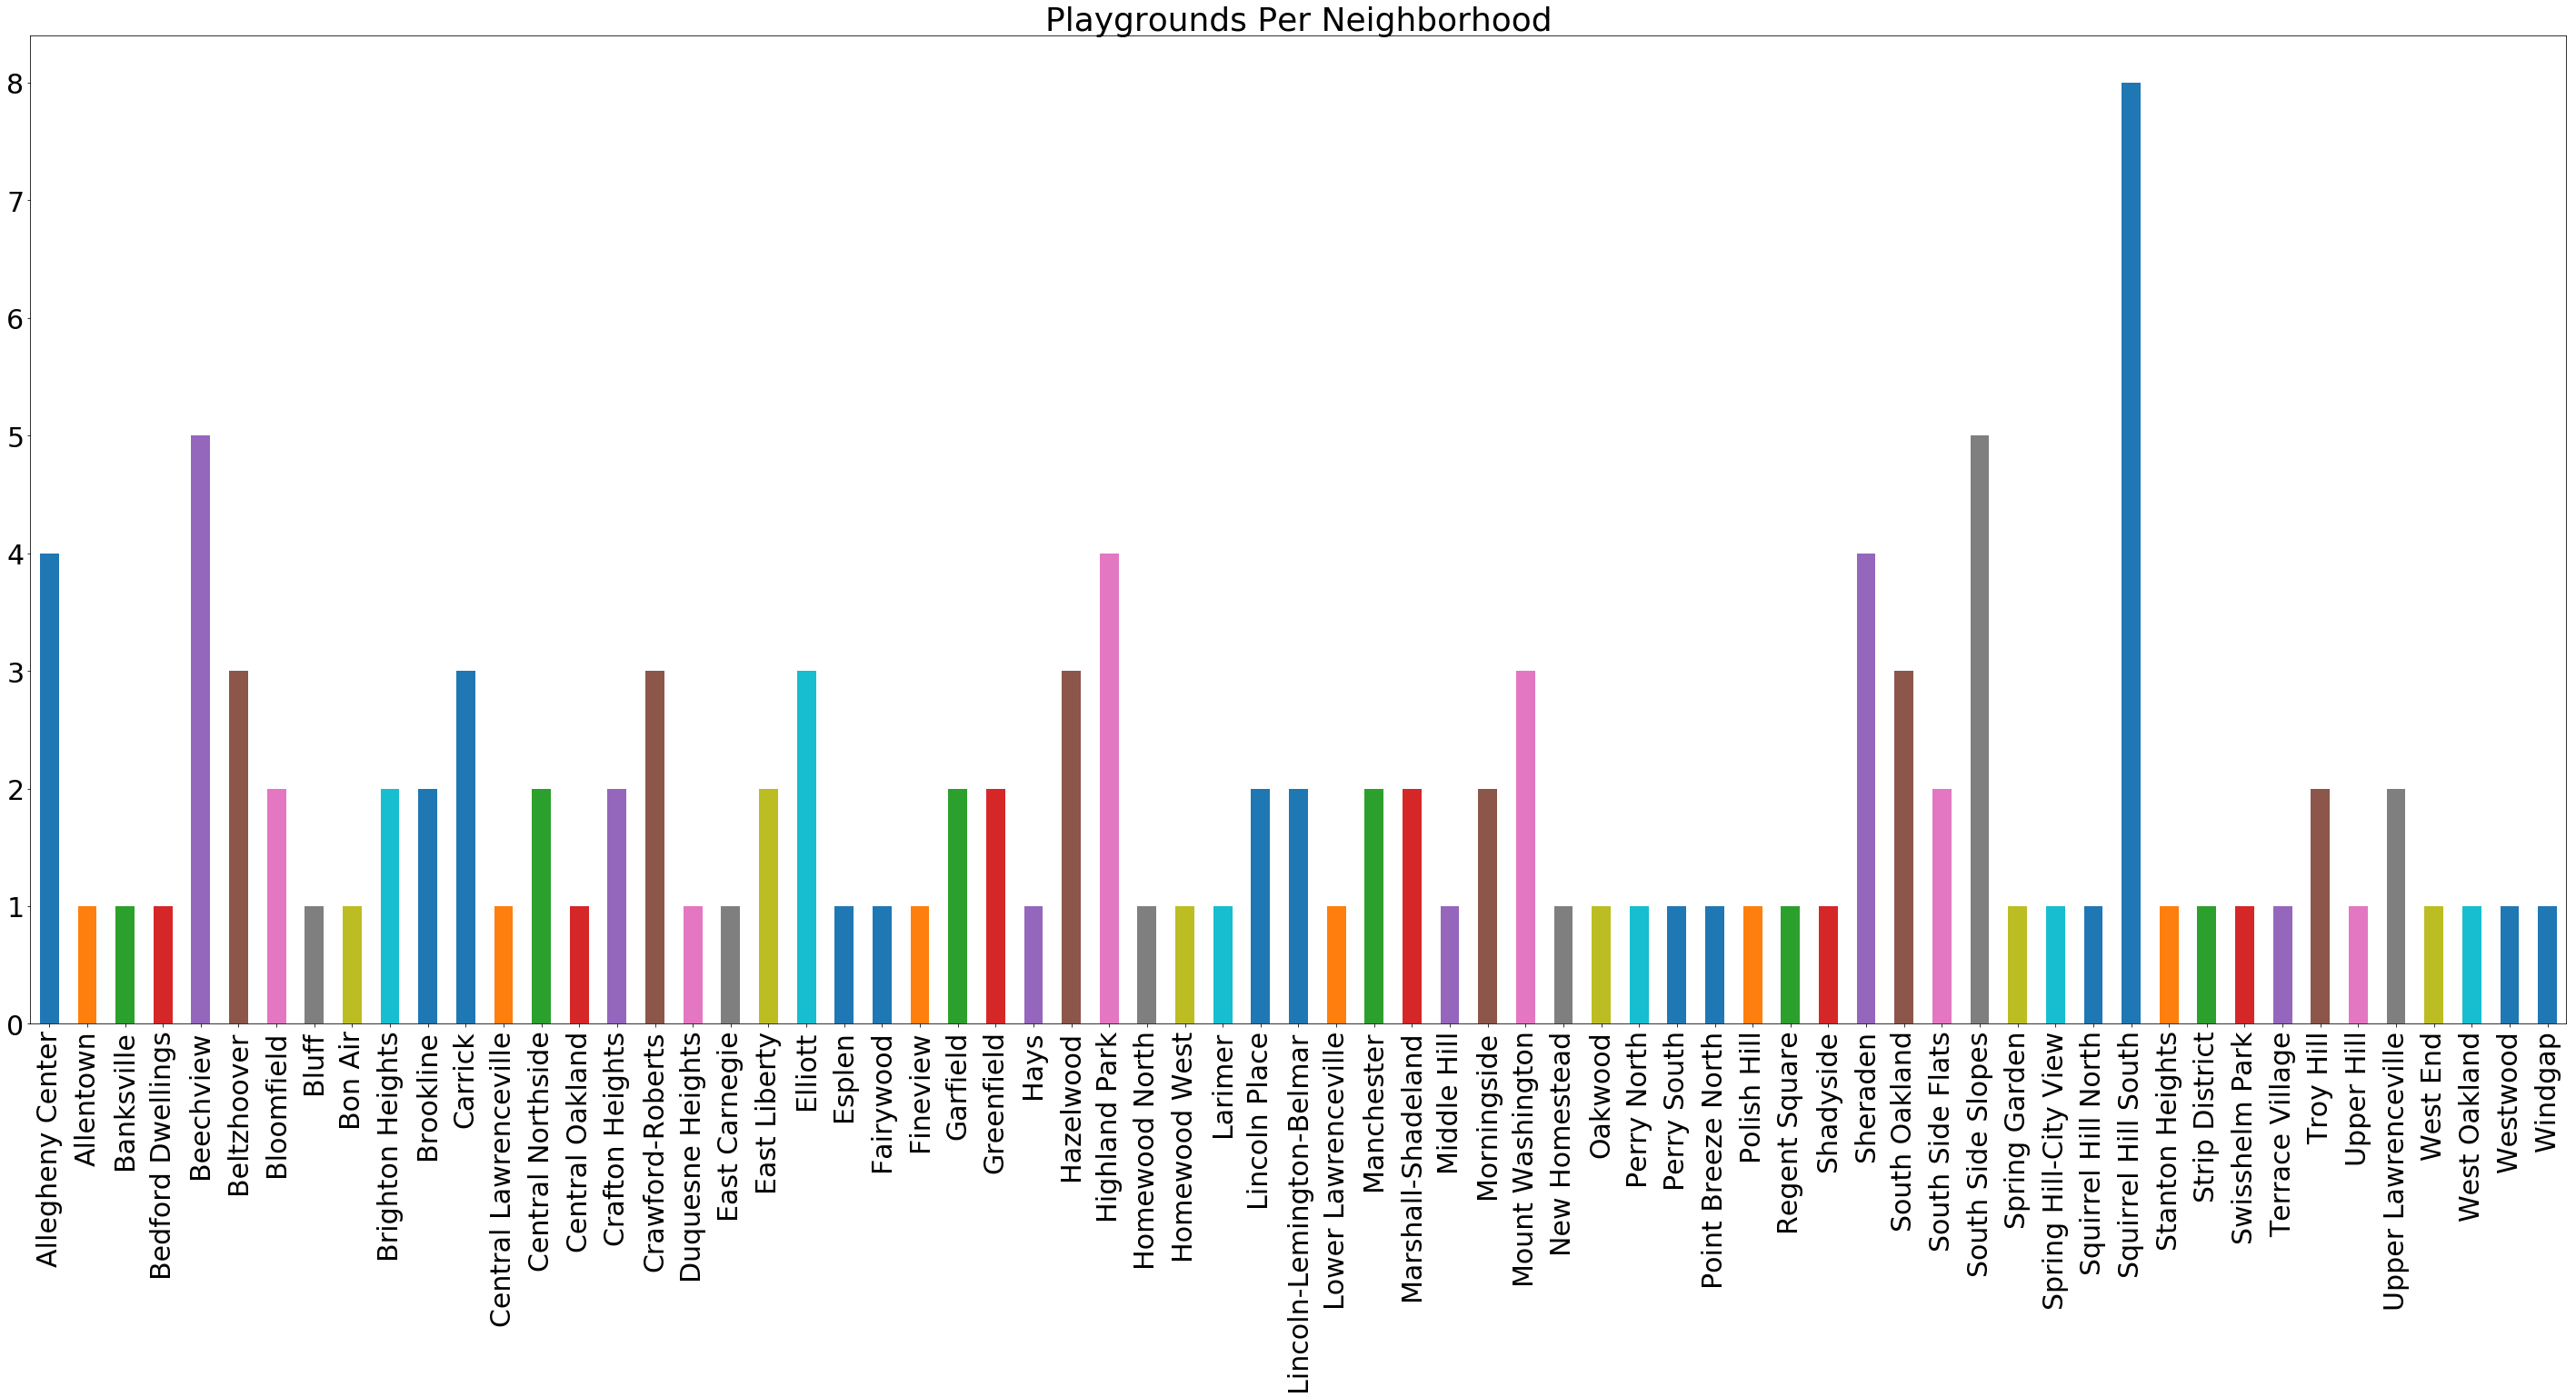

In [7]:
plt.rcParams.update({'font.size': 30})
playgrounds['neighborhood'].value_counts().sort_index().plot(figsize = (50,20), kind = 'bar',title = "Playgrounds Per Neighborhood")

From the figure of playgrounds, it is clearly seen that Squirrel Hill South has the most playgrounds. Although it has the most playgrounds, it does not necessarily mean it is the best neighborhood, as we must factor in associated water features as well.
Using a similar method of analysis, we can see how many water features are found within each neighborhood. 


## Water Features: Data and Graphs:
We can do the same thing we did for playgrounds to determine which neighborhood has the most water features:

In [5]:
water = pd.read_csv("https://data.wprdc.org/datastore/dump/513290a6-2bac-4e41-8029-354cbda6a7b7")
water.head()

,id,name,control_type,feature_type,inactive,make,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1816791851,Able Long Park,Continuous,Drinking Fountain,f,Regular Fountain,https://tools.wprdc.org/images/pittsburgh/wate...,Beechview,4,19,42003192000,5,19,6,4-28,40.408433,-80.028327
1,1599892422,Albert Turk Graham Park,On/Off,Drinking Fountain,f,Most Dependable,https://tools.wprdc.org/images/pittsburgh/wate...,Crawford-Roberts,6,3,42003030500,3,3,2,2-1,40.440445,-79.984061
2,1422043278,Allegheny Commons Arch St,Continuous,Drinking Fountain,f,Regular Fountain,https://tools.wprdc.org/images/pittsburgh/wate...,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.454382,-80.008277
3,1237191582,Allegheny Commons East Tennis Courts,Continuous,Drinking Fountain,f,Regular Fountain,https://tools.wprdc.org/images/pittsburgh/wate...,Allegheny Center,1,22,42003562700,1,22,1,1-6,40.450866,-80.001959
4,1146184773,Allegheny Commons Pool,Continuous,Drinking Fountain,f,Regular Fountain,https://tools.wprdc.org/images/pittsburgh/wate...,Allegheny Center,1,22,42003562700,1,22,1,1-6,40.450995,-80.001498


Lets look at a graph of all the water features again:

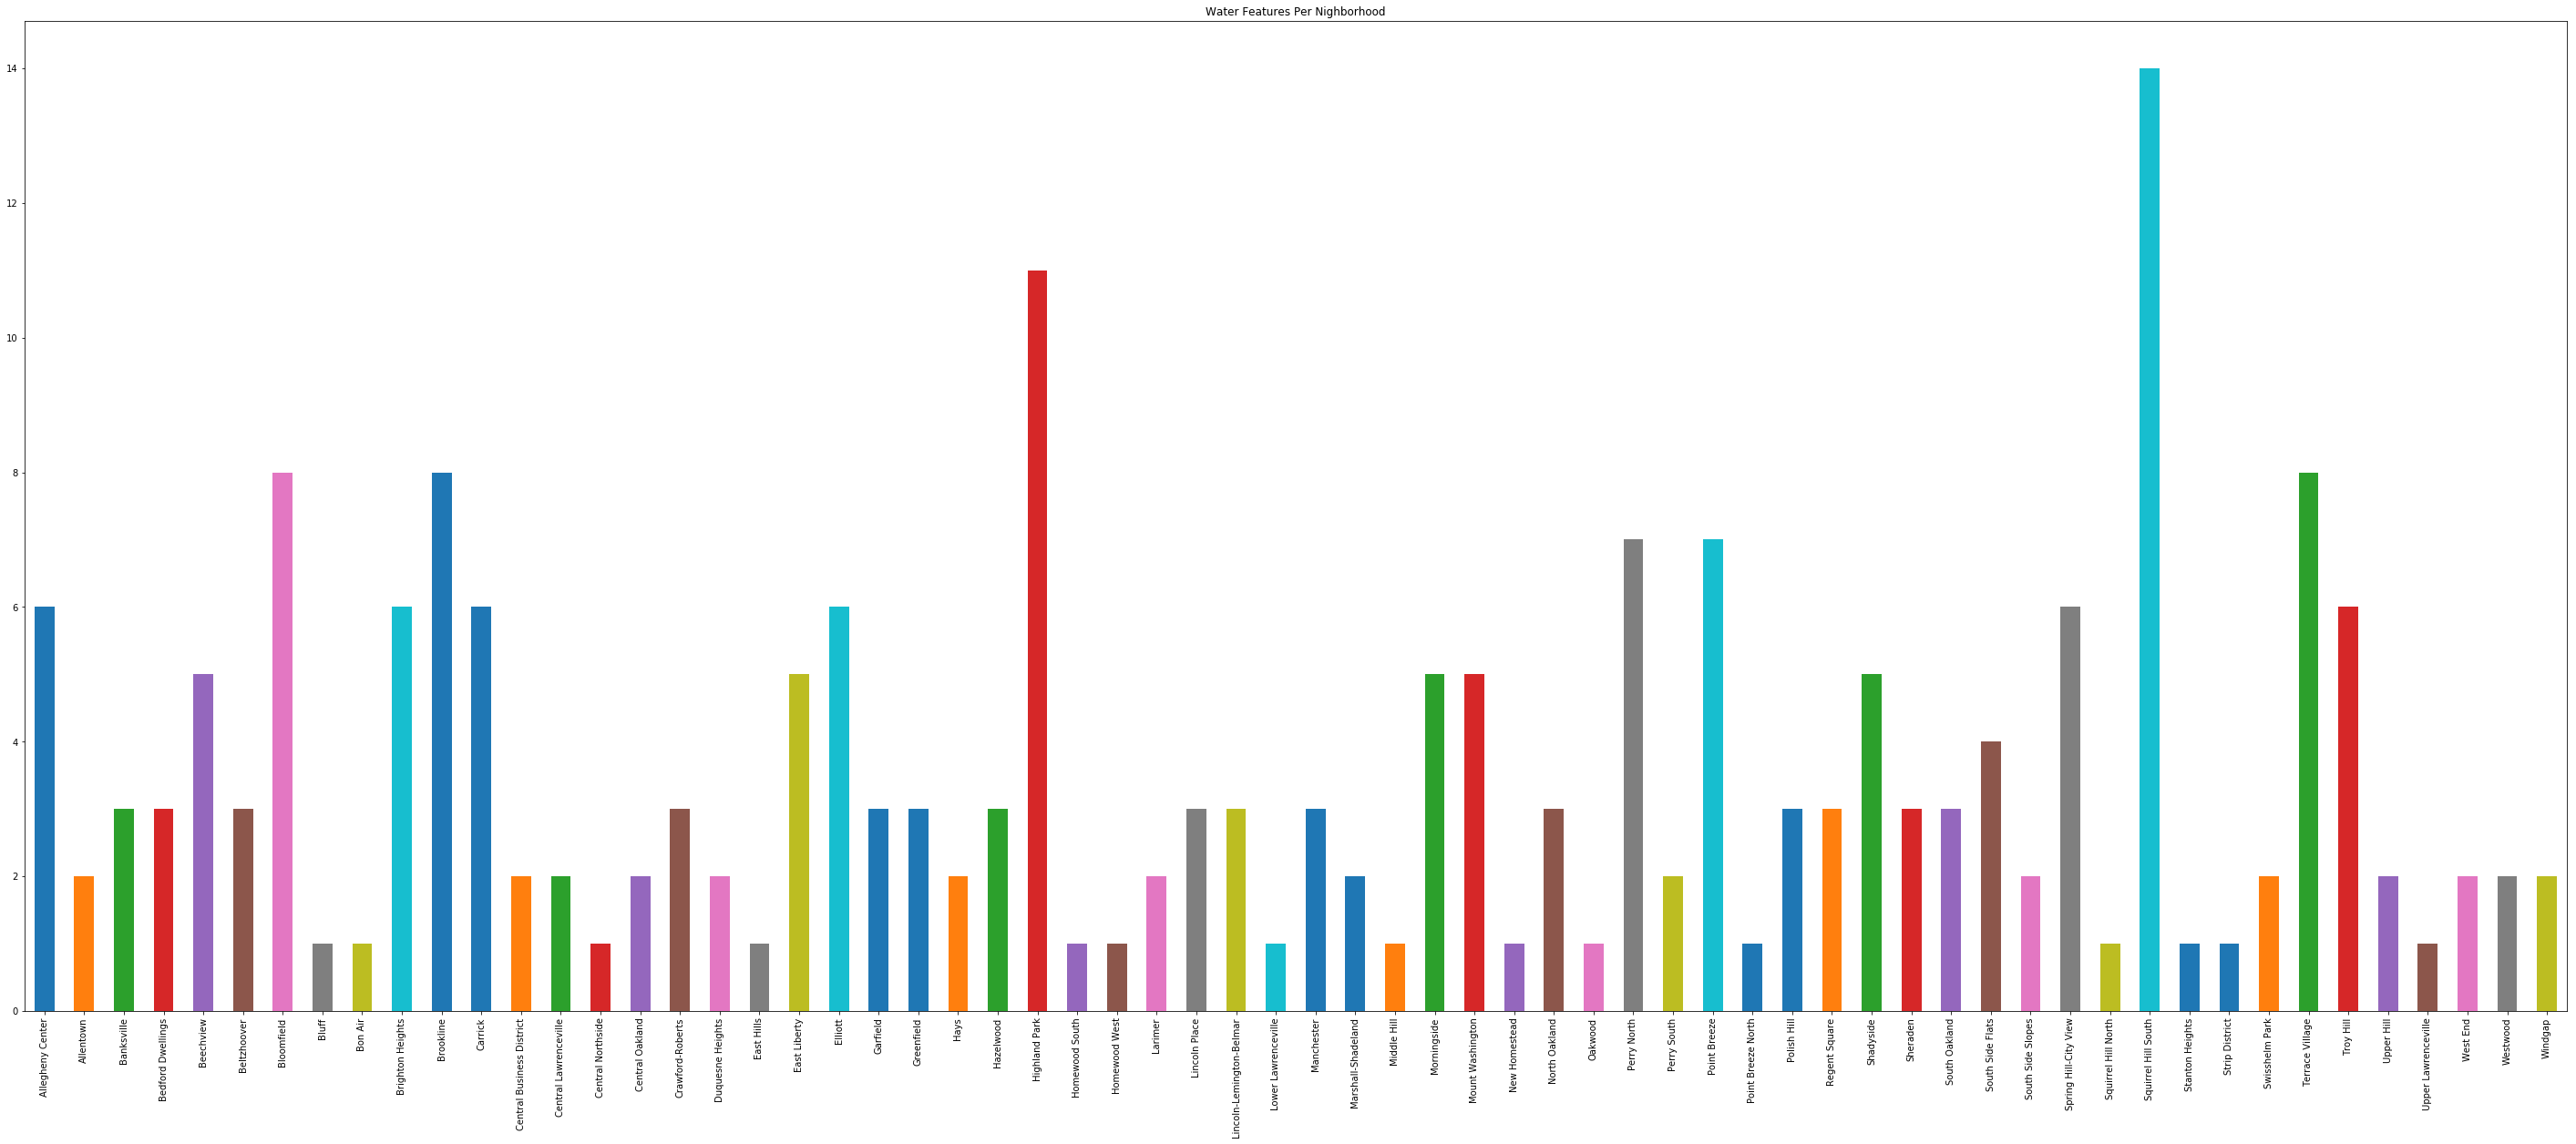

In [8]:
water['neighborhood'].value_counts().sort_index().plot(figsize = (50,20), kind = 'bar',title = "Water Features Per Nighborhood")

By analyzing these graphs separately, we can confirm the hypothesis that there is a relationship between the amount of playgrounds and water features within a neighborhood, because once again, the figures for the two are incredibly similar.
While South Squirrel Hill clearly possesses the most playgrounds and the most water features, it is still beneficial to observe both of our criteria in one graph, to have a better understanding of the quality of other Pittsburgh neighborhoods.


## Combining the two data sets

/ihome/crc/install/python/miniconda3-3.7/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


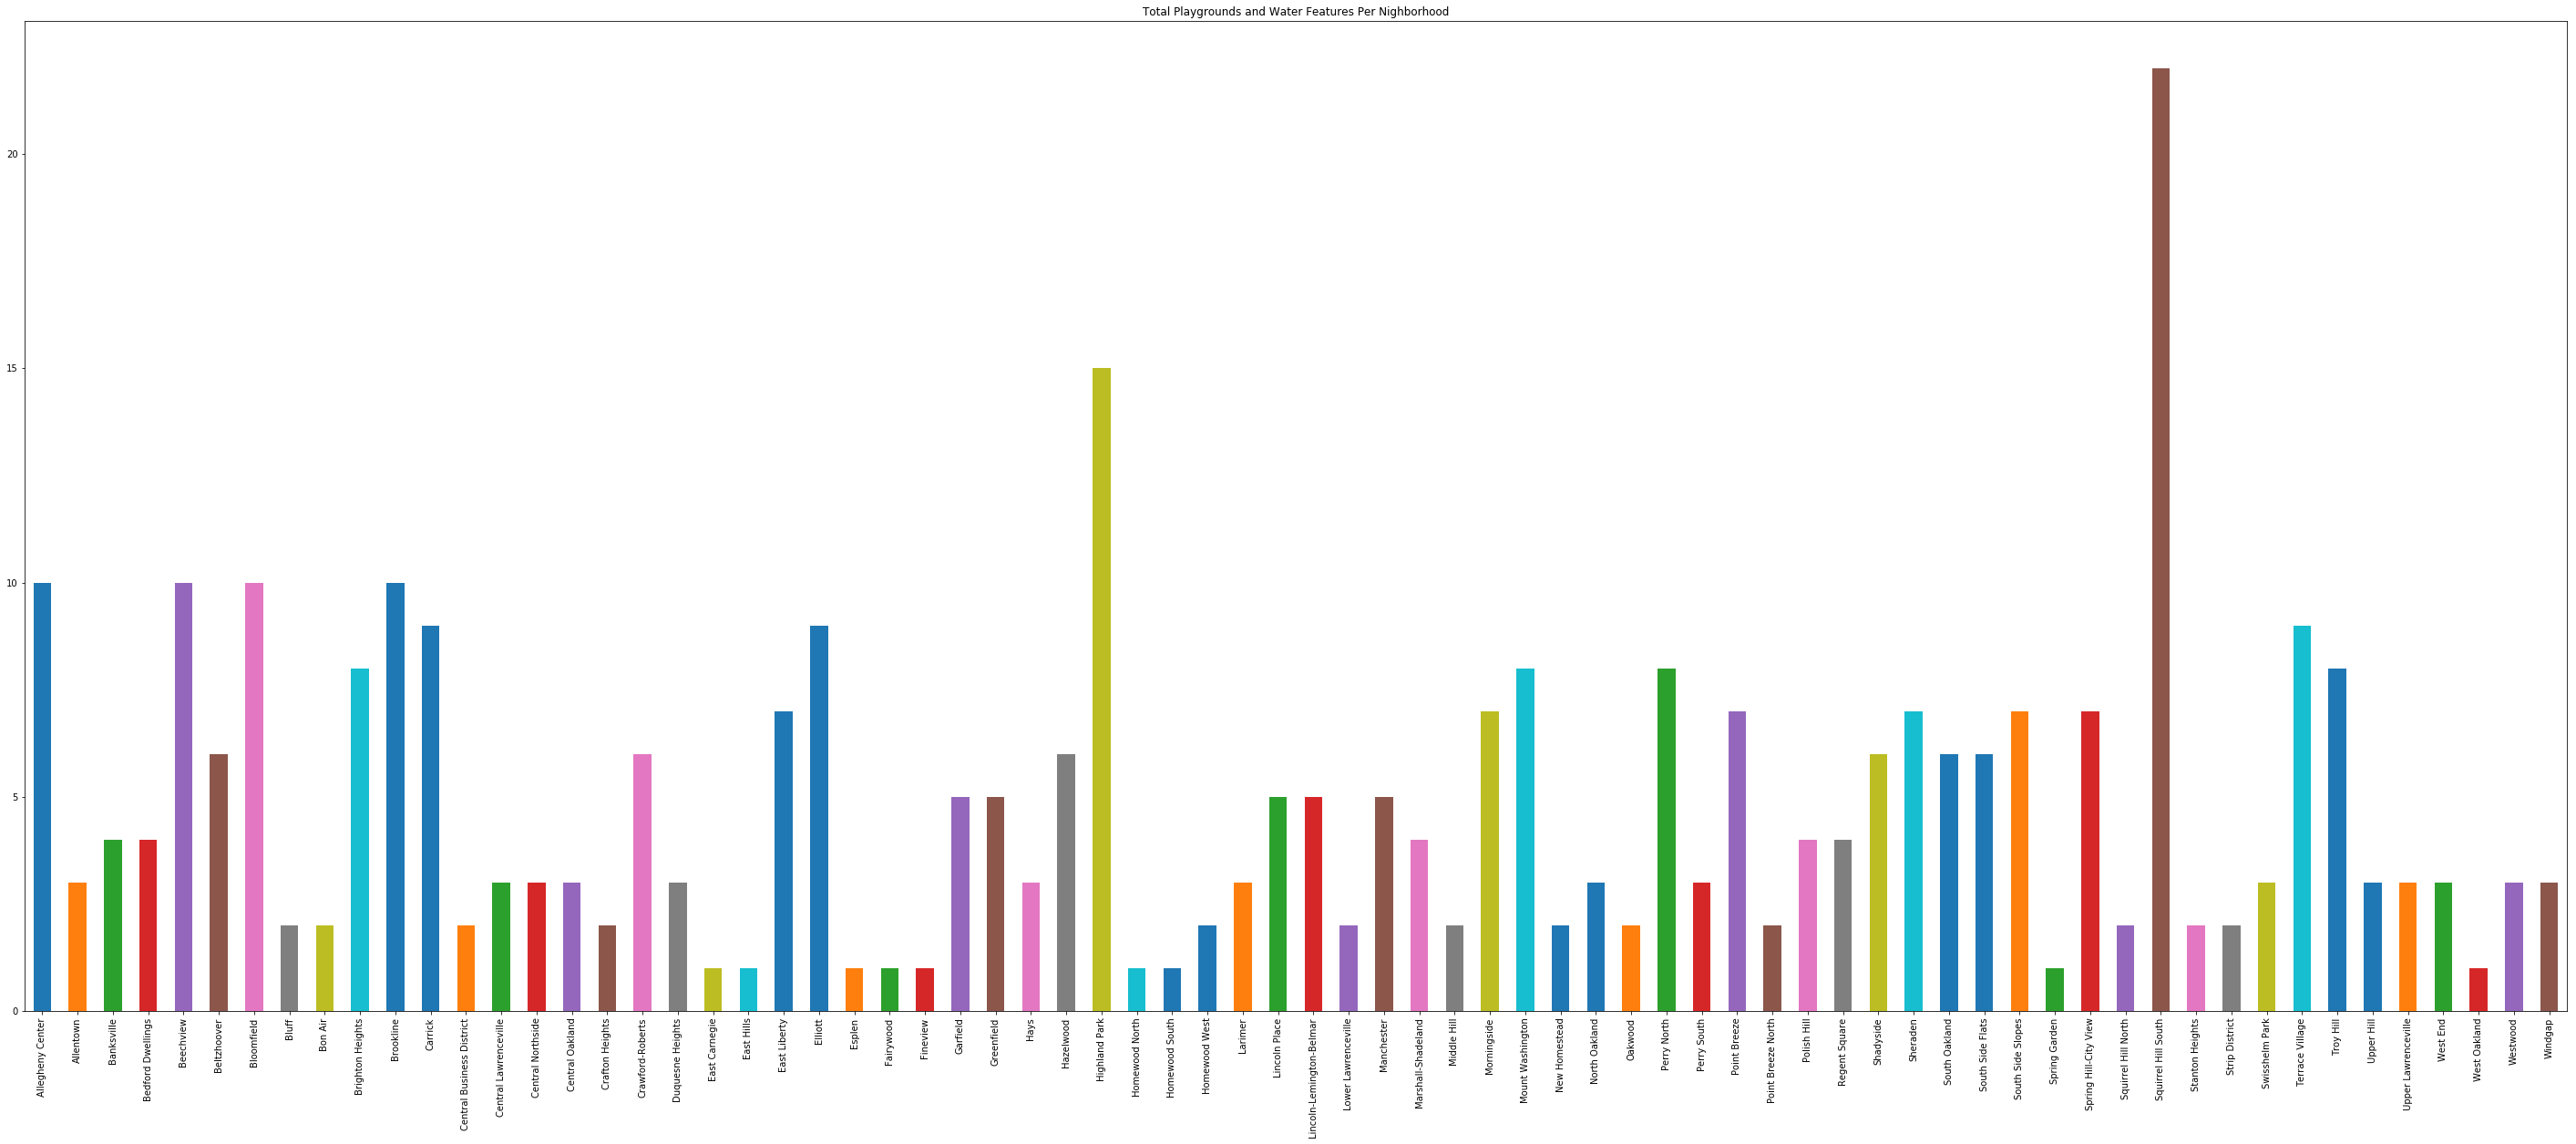

In [10]:
res = pd.concat([playgrounds,water])
res['neighborhood'].value_counts().sort_index().plot(figsize = (50,20), kind = 'bar',title = "Total Playgrounds and Water Features Per Nighborhood")

And finally, we can see a clear winner.

Based on the data and graphs, it is clear that Squirrel Hill South is the best neighborhood in Pittsburgh. From the combined graph of the two data sets, Squirrel Hill South easily meets our criteria the best, with over twenty playgrounds and water features in its general area.  Although Squirrel Hill South best aligns with our data, it does not necessarily make it our personal favorite neighborhood:

Thomas - I am not from the Pittsburgh area, so I don't really have any opinion on these neighborhoods, so in this instance, I would choose Squirrel Hill South as my most favored neighborhood because of my knowledge on it.

Zach - I am from a different state so I had no pre-existing opinions on the neighborhoods of Pittsburgh. Because of this, I believe our results to be accurate.

James - Although I am from the Pittsburgh area, I had little knowledge prior to completing this project about which neighborhoods had the most playgrounds and water features.  I happen to frequent Squirrel Hill though, and I am not surprised by the results the data produced, as there are a lot of fun places to go in Squirrel Hill.  It makes sense that Squirrel Hill South would have the most playgrounds and water features, and I would agree that it is the best neighborhood in the Pittsburgh area.